# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
path = '../data/processed/consistency_check/consistency_check_flash_thinking.json'

In [3]:
data = pd.read_json(path)
data.head()

,paper_id,paper_title,paper_abstract,review_ids,review_writers,review_contents,sentiment,sentiment_reason,tone,tone_reason,consistency,consistency_reason
0,iclr_2021_IFqrg1p5Bc,Distance-Based Regularisation of Deep Networks...,We investigate approaches to regularisation du...,"[GUlmylQMl3, pc1JzK8Hlux, TdQmSVH7w_w, LKQ3ydP...","[official_reviewer, official_reviewer, officia...",[This paper proposes new regularization method...,"[Negative, Positive, Positive, Positive, Negat...",[The review expresses significant concerns abo...,"[Critical, Neutral, Balanced, Supportive, Crit...","[The review uses phrases like 'misleading,' 'i...","[Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, ...","[The review is consistent in its critique, foc..."
1,nips_2021_khZGbgRQjjM,Stylized Dialogue Generation with Multi-Pass D...,"Stylized dialogue generation, which aims to ge...","[O8vM_cMz9y-, T2ikjIJ68m8, TPQmV9oN9dh, QaXWYZ...","[official_reviewer, official_reviewer, officia...",[ Thanks a lot for addressing my concerns.\nTh...,"[Positive, Neutral, Positive, Positive, Neutra...",[The reviewer expresses gratitude ('Thanks a l...,"[Supportive, Balanced, Supportive, Balanced, N...",[The reviewer uses phrases like 'Thanks a lot'...,"[Yes, Yes, Yes, Yes, Yes, Yes, Yes]",[The review expresses positive feedback regard...
2,nips_2022_kK200QKfvjB,Feature Learning in $L_2$-regularized DNNs: At...,We study the loss surface of DNNs with $L_{2}$...,"[s4bgf5KBgI2, AcUsOCVG5bu, WYWk9_4Lhe8, WtkW3F...","[official_reviewer, official_reviewer, officia...","[ Dear authors,\n\nThanks for the extensive cl...","[Positive, Positive, Neutral, Neutral, Positiv...",[The reviewer expresses satisfaction with the ...,"[Balanced, Supportive, Critical, Balanced, Bal...","[The tone is balanced, acknowledging the paper...","[Yes, Yes, Yes, Yes, Yes, Yes]",[The review is consistent as the reviewer expr...
3,iclr_2020_BkgNqkHFPr,Enhanced Convolutional Neural Tangent Kernels,Recent research shows that for training with l...,"[Byxqt4VztH, ryltv8TTFB, H1eOHZN2or, S1gzyEd6FH]","[official_reviewer, official_reviewer, officia...",[This paper shows that there is a one-to-one c...,"[Negative, Negative, Positive, Neutral]",[The reviewer expresses significant concerns a...,"[Critical, Critical, Supportive, Critical]","[The review uses direct and critical language,...","[Yes, Yes, Yes, Yes]",[The review is consistent because the reviewer...
4,iclr_2019_B1lfHhR9tm,The Natural Language Decathlon: Multitask Lear...,Deep learning has improved performance on many...,"[rJliXSXJ1E, Syx1siQK37, H1eWSvGJk4, BklnA4fky...","[official_reviewer, official_reviewer, officia...",[Thank you for replying. I understand the poi...,"[Positive, Positive, Positive, Positive, Posit...",[The reviewer expresses gratitude and acknowle...,"[Supportive, Balanced, Supportive, Balanced, S...",[The reviewer is supportive by acknowledging t...,"[Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, ...",[The reviewer explicitly states they updated t...


In [4]:
yes = no = 0

for row in data['consistency']:
    for status in row:
        if status=='Yes':
            yes+=1
        elif status=='No':
            no+=1
        else:
            print(f"Found something unusal: {status}!!")
            raise

print(f"Number of Yes: {yes}")
print(f"Number of No: {no}")

Number of Yes: 1030
Number of No: 13


In [5]:
plot_data = pd.DataFrame(data={'Yes': [yes], "No": [no]}).T
plot_data

,0
Yes,1030
No,13


# Consistency Distribution

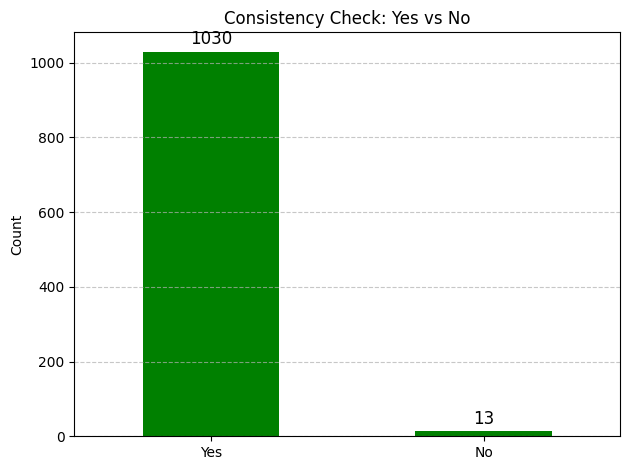

In [6]:
ax = plot_data.plot(kind='bar', legend=False, color=['green', 'red'])
plt.ylabel("Count")
plt.title("Consistency Check: Yes vs No")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(plot_data[0]):
    ax.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [7]:
# There are rarely any review comments that is not consistent with itself.
# Most of the reviewers are consistent with their point.
# For eg. if in the same review, the methodology is critisized and appreciated later, it has a consistency issue.

# Tf-Idf cluster - Consistency Reason

In [8]:
rows = []

for _, row in data.iterrows():
    paper_id = row['paper_id']
    cons_list = row['consistency']
    reason_list = row['consistency_reason']

    for c, r in zip(cons_list, reason_list):
        rows.append({'paper_id': paper_id, 'consistency': c, 'consistency_reason': r})

flat_df = pd.DataFrame(rows)

In [9]:
flat_df

,paper_id,consistency,consistency_reason
0,iclr_2021_IFqrg1p5Bc,Yes,"The review is consistent in its critique, focu..."
1,iclr_2021_IFqrg1p5Bc,Yes,The review is consistent because the reviewer ...
2,iclr_2021_IFqrg1p5Bc,Yes,The review is consistent because the weaknesse...
3,iclr_2021_IFqrg1p5Bc,Yes,The review is consistent as it expresses a cle...
4,iclr_2021_IFqrg1p5Bc,Yes,The review is consistent because the reviewer ...
...,...,...,...
1038,iclr_2022_l8It-0lE5e7,Yes,The review is consistent as the reviewer appre...
1039,iclr_2022_l8It-0lE5e7,Yes,The review is consistent because it identifies...
1040,iclr_2022_l8It-0lE5e7,Yes,The review is consistent because it highlights...
1041,iclr_2022_l8It-0lE5e7,Yes,The review is consistent in its criticism of t...


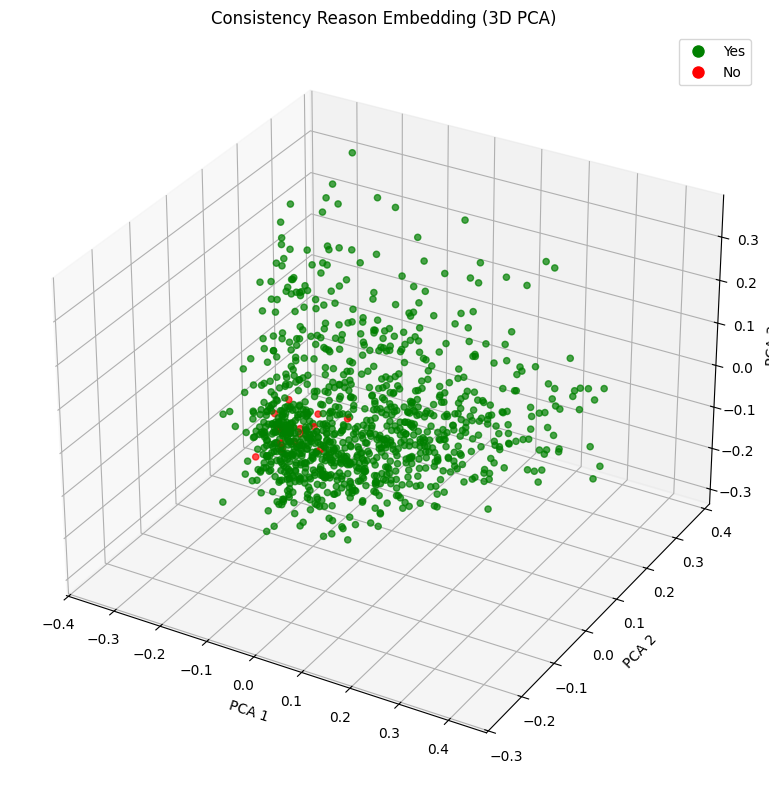

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

flat_df = flat_df[flat_df['consistency_reason'].notna()]

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(flat_df['consistency_reason'])

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

color_map = {'Yes': 'green', 'No': 'red'}
colors = flat_df['consistency'].map(color_map)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, alpha=0.7)

ax.set_title("Consistency Reason Embedding (3D PCA)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Yes', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='No', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [12]:
# Mapping of the consistency reason with consistency as a hue in 3d space is shown.
# It is visible that the majority of the reviews arae consistent within itself, and this is completely common in top tier.

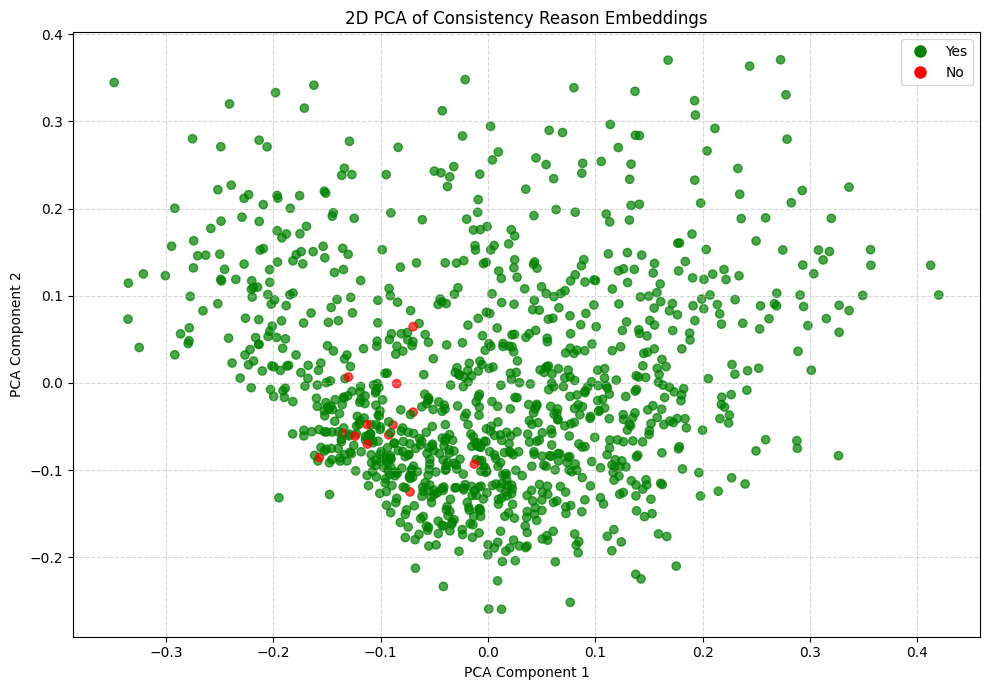

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

flat_df = flat_df[flat_df['consistency_reason'].notna()]

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(flat_df['consistency_reason'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

color_map = {'Yes': 'green', 'No': 'red'}
colors = flat_df['consistency'].map(color_map)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7)

plt.title("2D PCA of Consistency Reason Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Yes', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='No', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
# Similar 2d visualization